### Question:-

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:
     
   rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
   very good)
   age: woman's age
   yrs_married: number of years married
  children: number of children
  religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)
   educ: level of education (9 = grade school, 12 = high school, 14 =
  some college, 16 = college graduate, 17 = some graduate school, 20
  = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs


In [1]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from patsy import dmatrices
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score



In [2]:
# data = sm.datasets.fair.load_pandas().data

In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not
# data['affair'] = (data.affairs > 0).astype(int)

# y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
# data, return_type="dataframe")


# X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
# 'C(occupation)[T.3.0]':'occ_3',
# 'C(occupation)[T.4.0]':'occ_4',
# 'C(occupation)[T.5.0]':'occ_5',
# 'C(occupation)[T.6.0]':'occ_6',
# 'C(occupation_husb)[T.2.0]':'occ_husb_2',
# 'C(occupation_husb)[T.3.0]':'occ_husb_3',
# 'C(occupation_husb)[T.4.0]':'occ_husb_4',
# 'C(occupation_husb)[T.5.0]':'occ_husb_5',
# 'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# y = np.ravel(y)

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = sm.datasets.fair.load_pandas().data
df_affair = data.copy()

add "affair" column: 1 represents having affairs, 0 represents not

In [6]:
data['affair'] = (data.affairs > 0).astype(int)


In [7]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
data, return_type="dataframe")

In [8]:
X= X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [9]:
# showing first five rows
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
data.shape
# shape of the dataset

(6366, 10)

In [11]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [12]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
# statistical analysis of the dataset

data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


array([[<AxesSubplot:title={'center':'rate_marriage'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'yrs_married'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'religious'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'occupation_husb'}>,
        <AxesSubplot:title={'center':'affairs'}>],
       [<AxesSubplot:title={'center':'affair'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

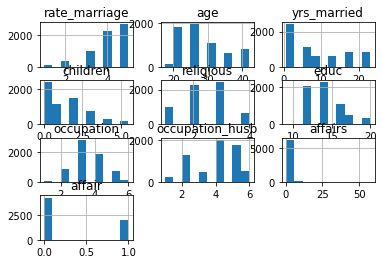

In [14]:
# plotting of all the columns

plt.figure(figsize=(20,20))
data.hist()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [17]:
# we will use statmodel to use logit function

logit = sm.Logit(y_train, x_train)

In [18]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.545144
         Iterations 6


In [19]:
predict = result.predict(x_test)

In [20]:
predict

5988    0.307694
217     0.499699
5339    0.308796
491     0.285319
3765    0.603005
          ...   
4919    0.351601
4574    0.466454
5740    0.296154
5662    0.156754
897     0.519288
Length: 1910, dtype: float64

In [21]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                  0.1285
Time:                        16:46:34   Log-Likelihood:                -2429.2
converged:                       True   LL-Null:                       -2787.3
Covariance Type:            nonrobust   LLR p-value:                4.321e-142
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5317      0.784      3.231      0.001       0.996       4.068
occ_2             0.4381      0.653      0.671      0.502      -0.842       1.718
occ_3             0.8584      0.647      1.328      0.184      -0.409       2.126
occ_4             0.6132      0.647      0.948      0.343      -0.654       1.881
occ_5             1.1167      0.651      1.714      0.087      -0.160       2.394
occ_6             1.4693      0.696      2.112      0.035       0.106       2.833
occ_husb_2        0.2539      0.217      1.168      0.243      -0.172       0.680
occ_husb_3        0.4757      0.236      2.017      0.044       0.014       0.938
occ_husb_4        0.2282      0.212      1.078      0.281      -0.187       0.643
occ_husb_5        0.2070      0.214      0.969      0.332      -0.212       0.626
occ_husb_6        0.2691      0.238      1.132      0.258      -0.197       0.735
rate_marriage    -0.6908      0.038    -18.375      0.000      -0.764      -0.617
age              -0.0525      0.012     -4.289      0.000      -0.076      -0.029
yrs_married       0.0988      0.013      7.532      0.000       0.073       0.125
children          0.0063      0.039      0.161      0.872      -0.070       0.082
religious        -0.3639      0.042     -8.760      0.000      -0.445      -0.283
educ             -0.0036      0.021     -0.175      0.861      -0.044       0.037
=================================================================================
"""

In [23]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [24]:
# implementing some EDA part
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [25]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [26]:
data.groupby('affair').mean()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


it is found that  women has also affair rate.

In [27]:
data.groupby('rate_marriage').mean()


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


we can say that increase in age, affair increases in children base on findings

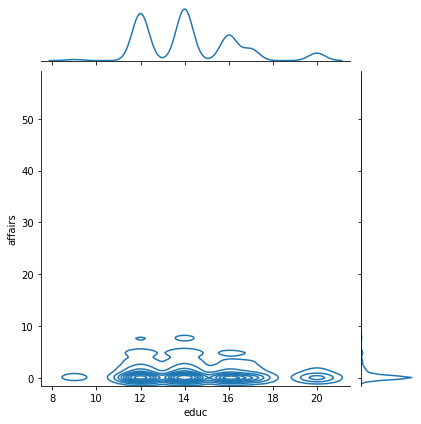

In [28]:
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=data,kind='kde')

# kde-- kernal density estimator

Text(0, 0.5, 'Frequency')

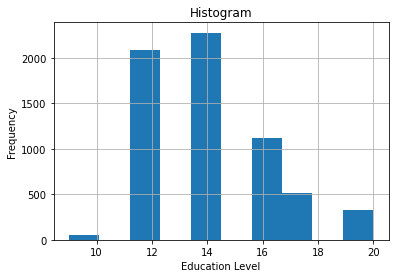

In [29]:
# plotting of Histogram

data['educ'].hist()
plt.title('Histogram')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

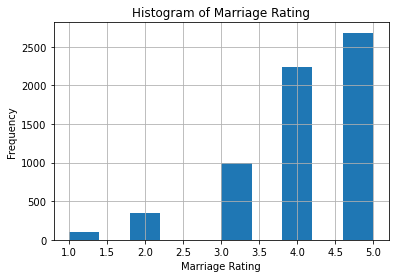

In [30]:
data['rate_marriage'].hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

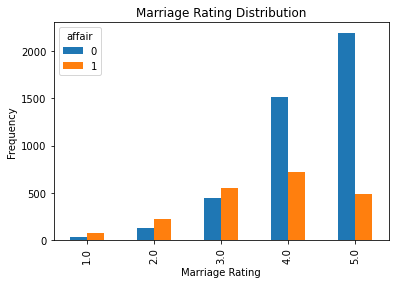

In [31]:
# Barplot visualisation for better understanding

pd.crosstab(data['rate_marriage'], data['affair']).plot(kind='bar')
plt.title('Marriage Rating Distribution')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

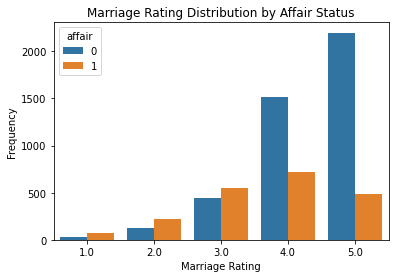

In [32]:
sns.countplot(x='rate_marriage',data=data,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

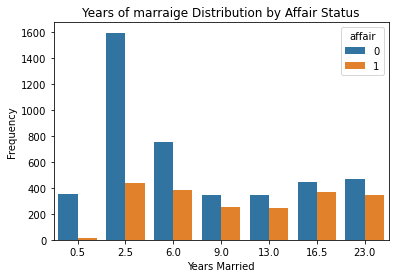

In [33]:
sns.countplot(x='yrs_married',data=data,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

In [34]:
# validation
from sklearn.model_selection import train_test_split


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
x_train.shape


(4456, 17)

In [37]:
x_test.shape


(1910, 17)

In [38]:
print(y_test.shape)
print(y_train.shape)

(1910,)
(4456,)


In [39]:
log_regression = LogisticRegression()

In [40]:
log_regression.fit(x_train, y_train)

LogisticRegression()

In [41]:
log_regression.score(x_train,y_train)

0.725314183123878

In [42]:
predict = log_regression.predict(x_test)

In [43]:
predict

array([0., 1., 0., ..., 0., 0., 1.])

In [44]:
# prediction of probabilites
proba = log_regression.predict_proba(x_test)

In [45]:
proba

array([[0.68066702, 0.31933298],
       [0.49688851, 0.50311149],
       [0.69123643, 0.30876357],
       ...,
       [0.71190626, 0.28809374],
       [0.8572406 , 0.1427594 ],
       [0.4686073 , 0.5313927 ]])

In [46]:
metrics.accuracy_score(y_test,predict)


0.7282722513089005

#### Accuracy of our model is 73%

In [47]:
metrics.roc_auc_score(y_test, proba[:, 1])

0.7583603520148217

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

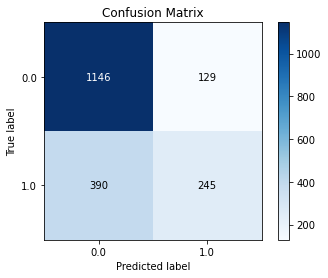

In [48]:
# to check performance using confusion matrix

import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predict)



here we got true_positive, true_negative,false_positive,false_negative values count



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

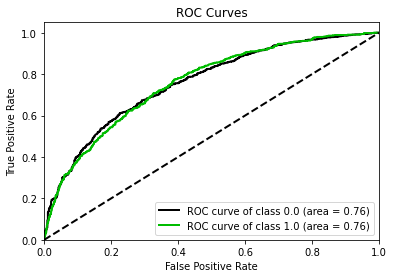

In [49]:
# lets plot ROC curve

scikitplot.metrics.plot_roc_curve(y_test, proba,curves=['each_class'])

In [50]:
metrics.classification_report(y_test, predict)

# values of accuracy, precision, recall, f1_score

'              precision    recall  f1-score   support\n\n         0.0       0.75      0.90      0.82      1275\n         1.0       0.66      0.39      0.49       635\n\n    accuracy                           0.73      1910\n   macro avg       0.70      0.64      0.65      1910\nweighted avg       0.72      0.73      0.71      1910\n'

In [51]:
# lets check for confusion matrix

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predict)


In [52]:
type(conf_matrix)

numpy.ndarray

In [53]:
conf_matrix.shape

(2, 2)

In [54]:
# calculations of Precision Recall F1_score


true_negative = conf_matrix[0,0] 
false_positive = conf_matrix[0,1]
false_negative = conf_matrix[1,0]
true_positive = conf_matrix[1,1] 




In [55]:
Precision = true_positive / (true_positive + false_positive)
Recall = true_positive / (true_positive + false_negative)
F1_score = (2 *(Precision * Recall)) / (Precision + Recall)
print(f'Precision : {Precision} , Recall : {Recall}, F1_score : {F1_score}')

Precision : 0.6550802139037433 , Recall : 0.3858267716535433, F1_score : 0.48562933597621405


In [56]:
# Now calculations of FPR and TPR
TPR = (true_positive) / (true_positive + false_positive)
FPR = false_positive / (false_positive + true_negative)
print(f'TPR: {TPR}')
print(f'FPR: {FPR}')

TPR: 0.6550802139037433
FPR: 0.1011764705882353


In [57]:
# Cross Validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72527473, 0.69544741, 0.73940345, 0.70800628, 0.71428571,
        0.72841444, 0.72955975, 0.70597484, 0.74842767, 0.75314465]),
 0.7247938943356733)

In [59]:
# Prediction of affairs 
log_regression.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))

array([[0.75936847, 0.24063153]])

The predicted probability of  affairs is 24%

In [64]:
log_regression.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 7, 1, 4,16]]))

array([[0.73300816, 0.26699184]])

In [66]:
print(f'{log_regression.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]]))}')

[0.]


Prediction result for given data is that the women doesn’t have affair.

